In [120]:
#importing the necessary libraries
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import datetime as dt

In [121]:
#reading the CSV file and storing it in a dataframe variable
df = pd.read_csv('Downloads/hotel_bookings.csv')

In [122]:
#having a look on our dataset
df.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,1/7/2015
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2/7/2015
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,3/7/2015


In [123]:
#checking the total no. of rows and columns of our dataset
df.shape

(119390, 32)

In [124]:
#checking the name of all columns present in the dataset
df.columns

Index(['hotel', 'is_canceled', 'lead_time', 'arrival_date_year',
       'arrival_date_month', 'arrival_date_week_number',
       'arrival_date_day_of_month', 'stays_in_weekend_nights',
       'stays_in_week_nights', 'adults', 'children', 'babies', 'meal',
       'country', 'market_segment', 'distribution_channel',
       'is_repeated_guest', 'previous_cancellations',
       'previous_bookings_not_canceled', 'reserved_room_type',
       'assigned_room_type', 'booking_changes', 'deposit_type', 'agent',
       'company', 'days_in_waiting_list', 'customer_type', 'adr',
       'required_car_parking_spaces', 'total_of_special_requests',
       'reservation_status', 'reservation_status_date'],
      dtype='object')

In [125]:
#Let's check the datatypes of all columns 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

In [127]:
#since column 'reservation_status_date' is not in datetime format, we need to convert it into one
df['reservation_status_date'] = pd.to_datetime(df['reservation_status_date'],infer_datetime_format=True)

In [128]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype         
---  ------                          --------------   -----         
 0   hotel                           119390 non-null  object        
 1   is_canceled                     119390 non-null  int64         
 2   lead_time                       119390 non-null  int64         
 3   arrival_date_year               119390 non-null  int64         
 4   arrival_date_month              119390 non-null  object        
 5   arrival_date_week_number        119390 non-null  int64         
 6   arrival_date_day_of_month       119390 non-null  int64         
 7   stays_in_weekend_nights         119390 non-null  int64         
 8   stays_in_week_nights            119390 non-null  int64         
 9   adults                          119390 non-null  int64         
 10  children                        119386 non-null  float64

In [129]:
df.describe(include = 'object')

,hotel,arrival_date_month,meal,country,market_segment,distribution_channel,reserved_room_type,assigned_room_type,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,10,12,3,4,3
top,City Hotel,August,BB,PRT,Online TA,TA/TO,A,A,No Deposit,Transient,Check-Out
freq,79330,13877,92310,48590,56477,97870,85994,74053,104641,89613,75166


In [131]:
#this loop is used to print unique elements present in each column of our dataset alongwith the column name
for col in df.describe(include = 'object').columns:             
    print(col)
    print(df[col].unique())
    print('-'*50)

hotel
['Resort Hotel' 'City Hotel']
--------------------------------------------------
arrival_date_month
['July' 'August' 'September' 'October' 'November' 'December' 'January'
 'February' 'March' 'April' 'May' 'June']
--------------------------------------------------
meal
['BB' 'FB' 'HB' 'SC' 'Undefined']
--------------------------------------------------
country
['PRT' 'GBR' 'USA' 'ESP' 'IRL' 'FRA' nan 'ROU' 'NOR' 'OMN' 'ARG' 'POL'
 'DEU' 'BEL' 'CHE' 'CN' 'GRC' 'ITA' 'NLD' 'DNK' 'RUS' 'SWE' 'AUS' 'EST'
 'CZE' 'BRA' 'FIN' 'MOZ' 'BWA' 'LUX' 'SVN' 'ALB' 'IND' 'CHN' 'MEX' 'MAR'
 'UKR' 'SMR' 'LVA' 'PRI' 'SRB' 'CHL' 'AUT' 'BLR' 'LTU' 'TUR' 'ZAF' 'AGO'
 'ISR' 'CYM' 'ZMB' 'CPV' 'ZWE' 'DZA' 'KOR' 'CRI' 'HUN' 'ARE' 'TUN' 'JAM'
 'HRV' 'HKG' 'IRN' 'GEO' 'AND' 'GIB' 'URY' 'JEY' 'CAF' 'CYP' 'COL' 'GGY'
 'KWT' 'NGA' 'MDV' 'VEN' 'SVK' 'FJI' 'KAZ' 'PAK' 'IDN' 'LBN' 'PHL' 'SEN'
 'SYC' 'AZE' 'BHR' 'NZL' 'THA' 'DOM' 'MKD' 'MYS' 'ARM' 'JPN' 'LKA' 'CUB'
 'CMR' 'BIH' 'MUS' 'COM' 'SUR' 'UGA' 'BGR' 'CIV' 'J

In [132]:
df.isnull().sum()                    #performing null values check in the dataset

hotel                                  0
is_canceled                            0
lead_time                              0
arrival_date_year                      0
arrival_date_month                     0
arrival_date_week_number               0
arrival_date_day_of_month              0
stays_in_weekend_nights                0
stays_in_week_nights                   0
adults                                 0
children                               4
babies                                 0
meal                                   0
country                              488
market_segment                         0
distribution_channel                   0
is_repeated_guest                      0
previous_cancellations                 0
previous_bookings_not_canceled         0
reserved_room_type                     0
assigned_room_type                     0
booking_changes                        0
deposit_type                           0
agent                              16340
company         

In [133]:
df.drop(['agent', 'company'], axis = 1, inplace = True)       #removing null values and columns which are not useful for us
df.dropna(inplace = True)

In [134]:
df.isnull().sum()                    #again performing null values check in the dataset

hotel                             0
is_canceled                       0
lead_time                         0
arrival_date_year                 0
arrival_date_month                0
arrival_date_week_number          0
arrival_date_day_of_month         0
stays_in_weekend_nights           0
stays_in_week_nights              0
adults                            0
children                          0
babies                            0
meal                              0
country                           0
market_segment                    0
distribution_channel              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
reserved_room_type                0
assigned_room_type                0
booking_changes                   0
deposit_type                      0
days_in_waiting_list              0
customer_type                     0
adr                               0
required_car_parking_spaces       0
total_of_special_requests   

In [135]:
df.describe()             #describing our dataset

,is_canceled,lead_time,arrival_date_year,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr,required_car_parking_spaces,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2016.157656,27.166555,15.800880,0.928897,2.502145,1.858391,0.104207,0.007948,0.032011,0.087142,0.131634,0.221181,2.330754,102.003243,0.061885,0.571683
std,0.483168,106.903309,0.707459,13.589971,8.780324,0.996216,1.900168,0.578576,0.399172,0.097380,0.176029,0.845869,1.484672,0.652785,17.630452,50.485862,0.244172,0.792678
min,0.000000,0.000000,2015.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000
25%,0.000000,18.000000,2016.000000,16.000000,8.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,70.000000,0.000000,0.000000
50%,0.000000,69.000000,2016.000000,28.000000,16.000000,1.000000,2.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,95.000000,0.000000,0.000000
75%,1.000000,161.000000,2017.000000,38.000000,23.000000,2.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000,0.000000,1.000000
max,1.000000,737.000000,2017.000000,53.000000,31.000000,16.000000,41.000000,55.000000,10.000000,10.000000,1.000000,26.000000,72.000000,21.000000,391.000000,5400.000000,8.000000,5.000000


In [136]:
df = df[df['adr'] < 5000]             #column adr has an outlier, so we are limiting the values of adr

In [137]:
#creating new variable to store canceled bookings
cancld_per = df['is_canceled'].value_counts(normalize = True)
cancld_per

0    0.628653
1    0.371347
Name: is_canceled, dtype: float64

# Analysis & Visualization

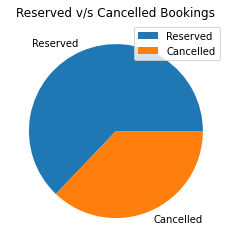

In [138]:
plt.pie(cancld_per, labels= ['Reserved', 'Cancelled'])
plt.title('Reserved v/s Cancelled Bookings')
plt.legend()
plt.show()

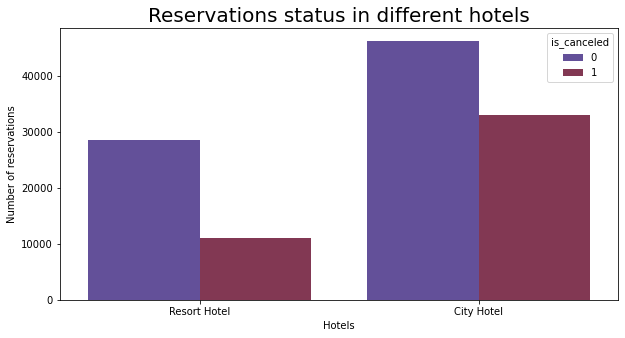

In [139]:
plt.figure(figsize = (10,5))
ax1 = sns.countplot(x = 'hotel', hue = 'is_canceled', data = df, palette = 'twilight')
plt.title('Reservations status in different hotels', size = 20)
plt.xlabel('Hotels')
plt.ylabel('Number of reservations')
plt.show()

In [140]:
resort_hotel = df[df['hotel'] == 'Resort Hotel']
resort_hotel['is_canceled'].value_counts(normalize = True)

0    0.72025
1    0.27975
Name: is_canceled, dtype: float64

In [141]:
city_hotel = df[df['hotel'] == 'City Hotel']
city_hotel['is_canceled'].value_counts(normalize = True)

0    0.582918
1    0.417082
Name: is_canceled, dtype: float64

In [142]:
resort_hotel = resort_hotel.groupby('reservation_status_date')[['adr']].mean()
city_hotel = city_hotel.groupby('reservation_status_date')[['adr']].mean()

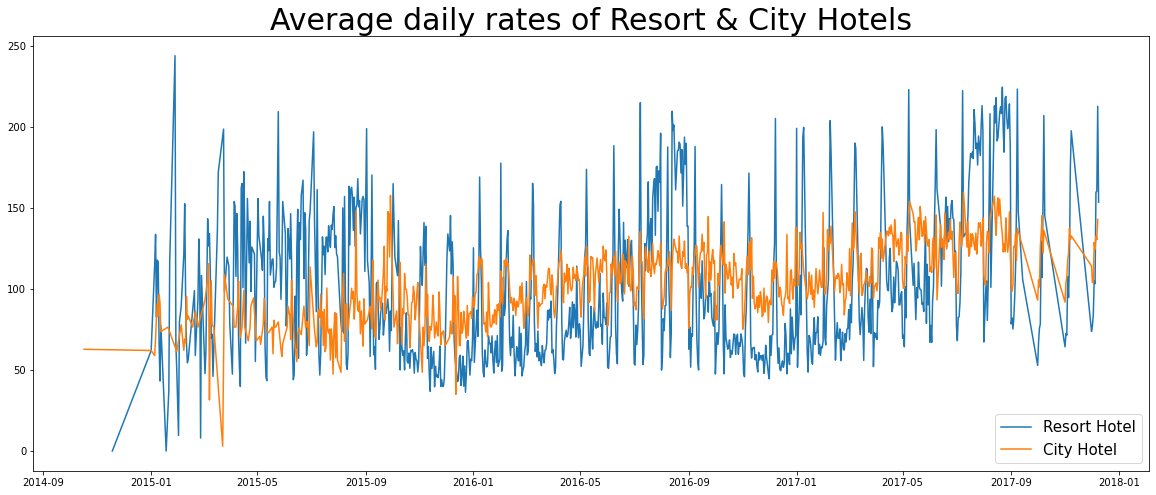

In [143]:
plt.figure(figsize=(20,8))
plt.plot(resort_hotel.index, resort_hotel['adr'], label = 'Resort Hotel')
plt.plot(city_hotel.index, city_hotel['adr'], label = 'City Hotel')
plt.title('Average daily rates of Resort & City Hotels', fontsize = 30)
plt.legend(fontsize = 15)
plt.show()

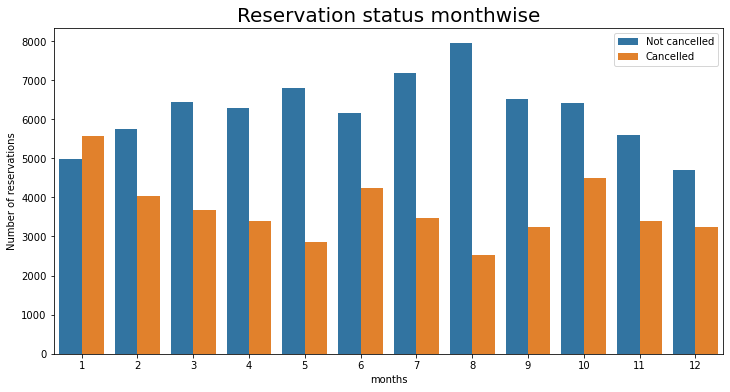

In [144]:
df['months'] = df['reservation_status_date'].dt.month
plt.figure(figsize = (12,6))
ax1 = sns.countplot(x = df['months'], hue = 'is_canceled', data = df)
plt.title('Reservation status monthwise', fontsize = 20)
plt.ylabel('Number of reservations')
plt.legend(['Not cancelled', 'Cancelled'])
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


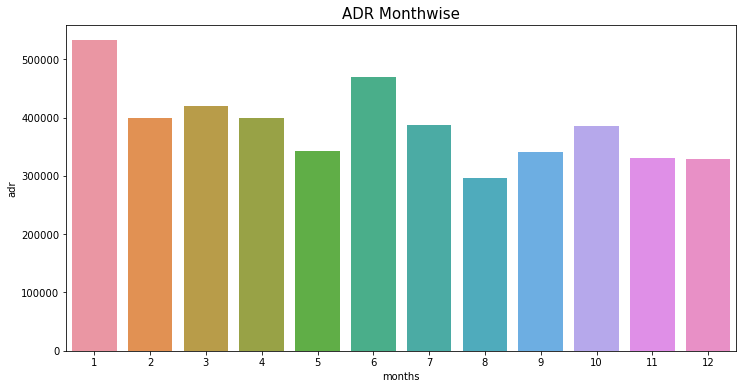

In [145]:
plt.figure(figsize = (12,6))
plt.title('ADR Monthwise', fontsize = 15)
sns.barplot('months', 'adr', data = df[df['is_canceled'] == 1].groupby('months')[['adr']].sum().reset_index())
plt.show()

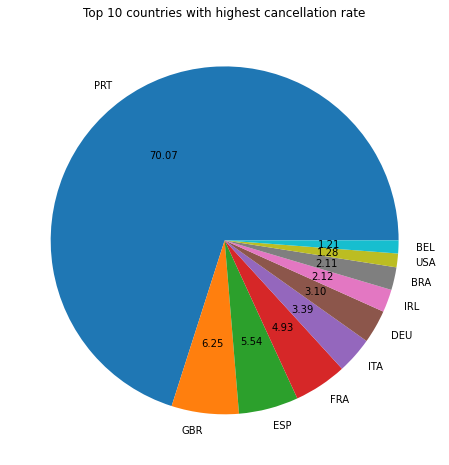

In [146]:
cancelled = df[df['is_canceled'] == 1]
top_10_country = cancelled['country'].value_counts()[:10]
plt.figure(figsize = (8,8))
plt.title('Top 10 countries with highest cancellation rate')
plt.pie(top_10_country, autopct = '%.2f', labels = top_10_country.index)
plt.show()

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


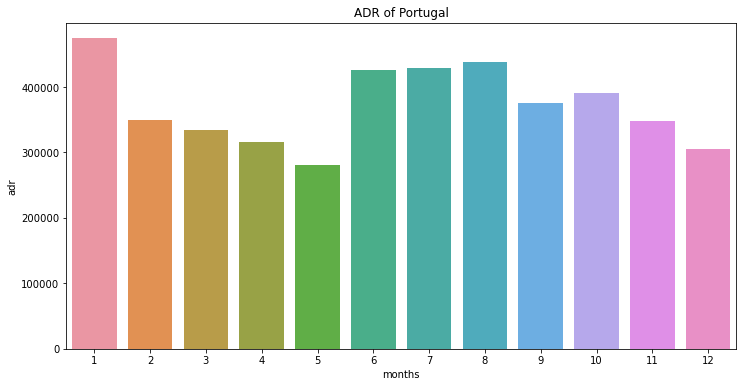

In [147]:
prt_adr = df[df['country']=='PRT'].groupby('months')[['adr']].sum().reset_index() 
plt.figure(figsize = (12,6))
sns.barplot('months', 'adr', data = prt_adr)
plt.title('ADR of Portugal')
plt.show()

In [149]:
#creating new variable to store percentage of market segment from each sources
ms = df['market_segment'].value_counts(normalize = True)
ms

Online TA        0.474377
Offline TA/TO    0.203193
Groups           0.166581
Direct           0.104696
Corporate        0.042987
Complementary    0.006173
Aviation         0.001993
Name: market_segment, dtype: float64

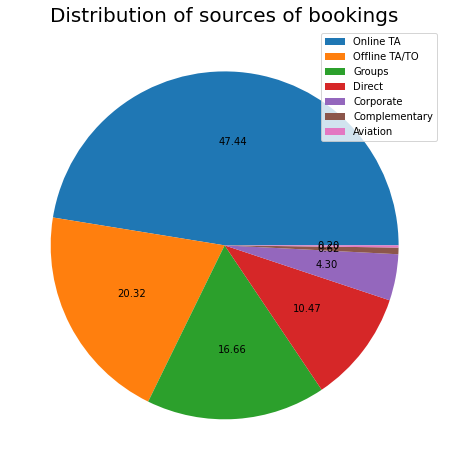

In [150]:
plt.figure(figsize = (8,8))
plt.pie(ms, autopct = '%.2f' )
plt.title('Distribution of sources of bookings', fontsize = 20)
plt.legend(ms.index)
plt.show()

In [151]:
#creating new variable to store cancelled bookings from each sources
can_sources = cancelled['market_segment'].value_counts(normalize = True)
can_sources

Online TA        0.469696
Groups           0.273985
Offline TA/TO    0.187466
Direct           0.043486
Corporate        0.022151
Complementary    0.002038
Aviation         0.001178
Name: market_segment, dtype: float64

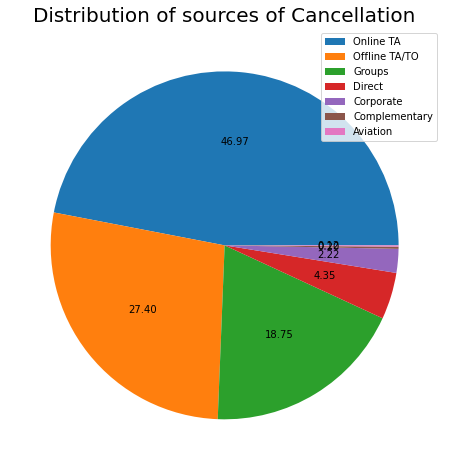

In [152]:
plt.figure(figsize = (8,8))
plt.pie(can_sources, autopct = '%.2f' )
plt.title('Distribution of sources of Cancellation', fontsize = 20)
plt.legend(ms.index)
plt.show()

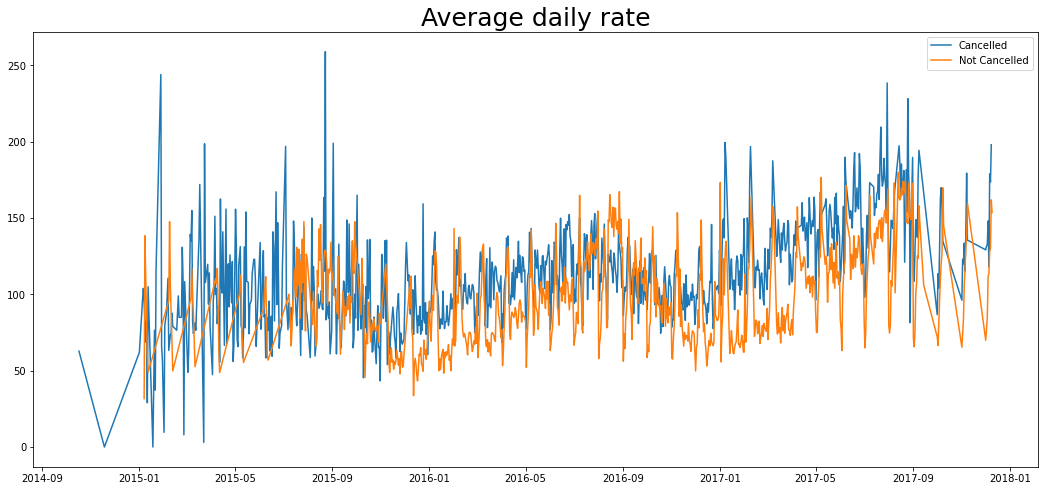

In [154]:
#creating two new variables to store canceled and booked booking's average daily rate(ADR)

cancelled_df_adr = cancelled.groupby('reservation_status_date')[['adr']].mean()
cancelled_df_adr.reset_index(inplace = True)
cancelled_df_adr.sort_values('reservation_status_date', inplace = True)

not_cancelled = df[df['is_canceled'] == 0]
not_can_df_adr = not_cancelled.groupby('reservation_status_date')[['adr']].mean()
not_can_df_adr.reset_index(inplace = True)
not_can_df_adr.sort_values('reservation_status_date', inplace = True)

plt.figure(figsize = (18,8))
plt.title('Average daily rate', fontsize = 25)
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.plot(not_can_df_adr['reservation_status_date'], not_can_df_adr['adr'], label = 'Not Cancelled')
plt.legend()
plt.show()

In [155]:
#performing a limit on 'reservation_status_date' column to get consistent booking values 
cancelled_df_adr = cancelled_df_adr[(cancelled_df_adr['reservation_status_date'] > '2015-08') & (cancelled_df_adr['reservation_status_date'] < '2017-09')]
not_can_df_adr = not_can_df_adr[(not_can_df_adr['reservation_status_date'] > '2015-08') & (not_can_df_adr['reservation_status_date'] < '2017-09')]

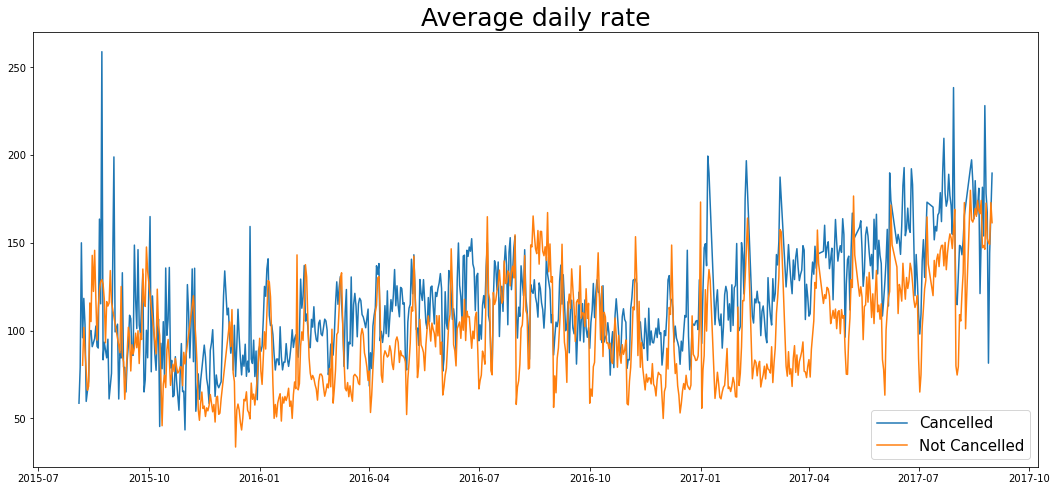

In [156]:
plt.figure(figsize = (18,8))
plt.title('Average daily rate', fontsize = 25)
plt.plot(cancelled_df_adr['reservation_status_date'], cancelled_df_adr['adr'], label = 'Cancelled')
plt.plot(not_can_df_adr['reservation_status_date'], not_can_df_adr['adr'], label = 'Not Cancelled')
plt.legend(fontsize=15)
plt.show()